In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train[0]

5

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example.shape

(60000, 10)

In [11]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

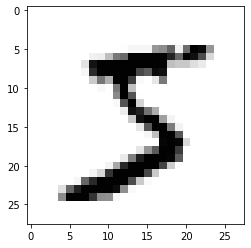

In [14]:
plt.imshow(x_train[0],cmap="Greys")

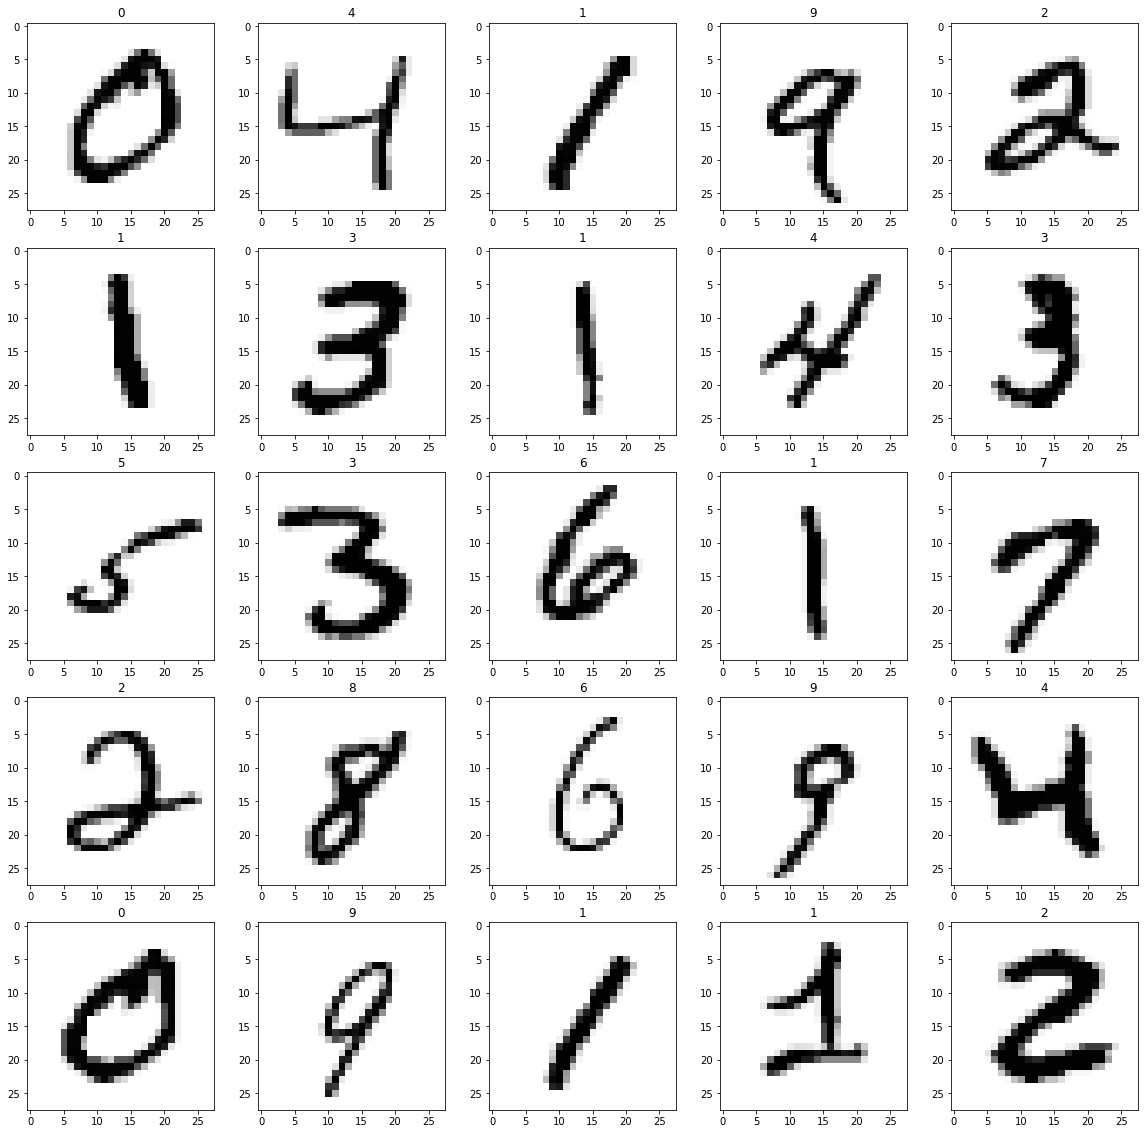

In [15]:
plt.figure(figsize=(20,20))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i],cmap="Greys")
    plt.title(f"{y_train[i]}")


In [16]:
y_example.shape

(60000, 10)

In [17]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test  = to_categorical(y_test, num_classes=10)

In [18]:
y_cat_test.shape

(10000, 10)

In [19]:
y_cat_train.shape

(60000, 10)

In [20]:
y_example.shape

(60000, 10)

In [21]:
x_train = x_train/255
x_test  = x_test/255

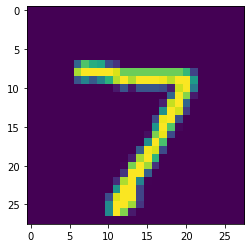

In [22]:
plt.imshow(x_test[0])

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
          
model.add(Dense(units=128,activation = "relu"))
          
model.add(Dense(units =10,activation = "softmax"))
          
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ['accuracy','acc'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_accuracy",patience=2)

In [30]:
model.fit(x= x_train, y = y_cat_train , epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1392 - accuracy: 0.9582 - acc: 0.9582 - val_loss: 0.0549 - val_accuracy: 0.9803 - val_acc: 0.9803
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0467 - accuracy: 0.9850 - acc: 0.9850 - val_loss: 0.0525 - val_accuracy: 0.9825 - val_acc: 0.9825
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0309 - accuracy: 0.9900 - acc: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9881 - val_acc: 0.9881
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0215 - accuracy: 0.9932 - acc: 0.9932 - val_loss: 0.0564 - val_accuracy: 0.9840 - val_acc: 0.9840
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0147 - accuracy: 0.9955 - acc: 0.9955 - val_loss: 0.0453 - val_accuracy: 0.9870 - val_acc: 0.9870


In [31]:
metrics = pd.DataFrame(model.history.history)

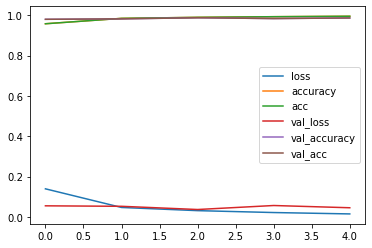

In [32]:
metrics.plot()

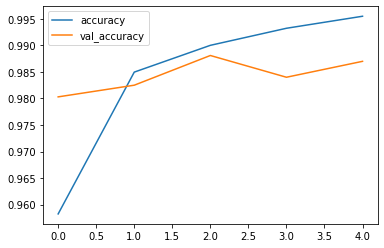

In [33]:
metrics[['accuracy','val_accuracy']].plot()

In [34]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9870 - acc: 0.9870


[0.045260898768901825, 0.9869999885559082, 0.9869999885559082]

In [35]:
predictions = model.predict(x_test)

In [36]:
predictions

array([[3.6768981e-09, 1.7690774e-09, 2.5235009e-08, ..., 9.9999964e-01,
        9.8803852e-08, 1.2565030e-07],
       [2.7568373e-07, 1.9257383e-08, 9.9998474e-01, ..., 3.0825384e-11,
        7.1921807e-10, 2.2037121e-09],
       [2.2577433e-06, 9.9997008e-01, 1.6203343e-07, ..., 1.8378034e-05,
        2.5720310e-06, 3.6458878e-09],
       ...,
       [1.7421298e-12, 2.1680735e-09, 6.2240005e-11, ..., 2.9396443e-08,
        1.0516708e-08, 2.5741306e-07],
       [2.1007134e-08, 3.2569000e-13, 7.4572971e-16, ..., 1.1496992e-10,
        1.1034568e-04, 3.5067229e-09],
       [1.4802105e-09, 1.9946360e-12, 3.9062559e-11, ..., 1.0955641e-13,
        1.8014460e-09, 2.9944876e-11]], dtype=float32)

In [37]:
predictions.shape

(10000, 10)

In [38]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
from PIL import Image, ImageOps

In [40]:
img5 = Image.open("5.png")
img5 = ImageOps.grayscale(img5)

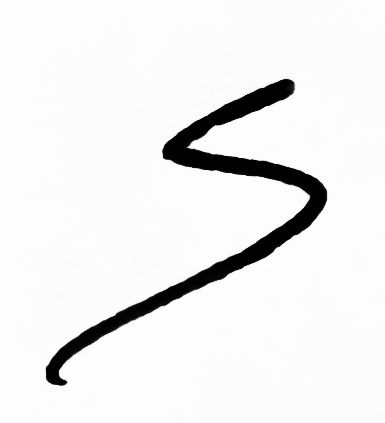

In [41]:
img5

In [100]:
img7 = Image.open("3.png")
img7 = ImageOps.colorize(img7,black="black",white="white")

AssertionError: 

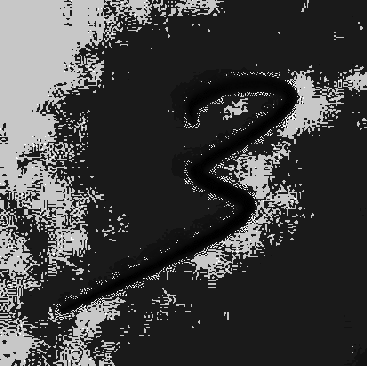

In [83]:
img7

In [84]:
print(img5.size)
print(img7.size)

(28, 28)
(367, 366)


In [85]:
img5 = img5.resize((28,28))
img7 = img7.resize((28,28))
print(img5.size)
print(img7.size)

(28, 28)
(28, 28)


In [86]:
img5

In [87]:
I5 = np.asarray(img5)

In [88]:
type(I5)

numpy.ndarray

In [89]:
I5=I5.reshape((28,28))

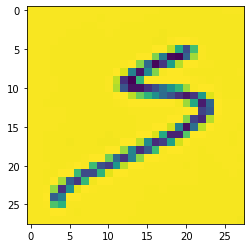

In [90]:
plt.imshow(I5)

In [91]:
I5 = I5/255

In [92]:
model.predict_classes(I5.reshape(1,28,28,1))

array([5])

In [93]:
I7 = np.asarray(img7)

In [94]:
I7=I7.reshape((28,28))
I7 = I7/255

ValueError: cannot reshape array of size 2352 into shape (28,28)

In [81]:
model.predict_classes(I7.reshape(1,28,28,1))

array([8])

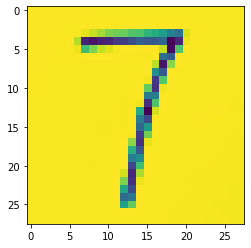

In [56]:
plt.imshow(I7)

In [57]:
img3 = Image.open("3.png")
img3 = ImageOps.grayscale(img3)
img8 = Image.open("8.png")
img8 = ImageOps.grayscale(img8)
img9 = Image.open("9.png")
img9 = ImageOps.grayscale(img9)

In [58]:
img3 = img3.resize((28,28))
img8 = img8.resize((28,28))
img9 = img9.resize((28,28))

In [59]:
I3 = np.asarray(img3)
I8 = np.asarray(img8)
I9 = np.asarray(img9)

In [60]:
I3 = I3/255
I8 = I8/255
I9 = I9/255

In [61]:
model.predict_classes(I3.reshape(1,28,28,1))

array([8])

In [62]:
model.predict_classes(I8.reshape(1,28,28,1))

array([8])

In [63]:
model.predict_classes(I9.reshape(1,28,28,1))

array([2])

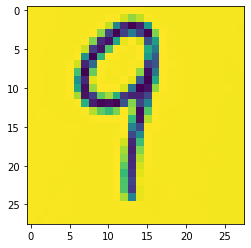

In [64]:
plt.imshow(I9)

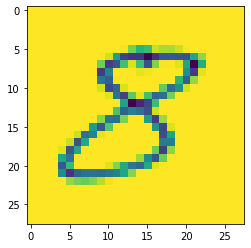

In [65]:
plt.imshow(I8)

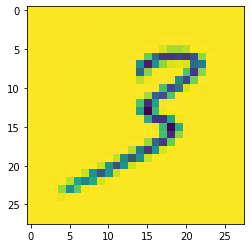

In [67]:
plt.imshow(I3)